In [1]:
using Gridap, GridapMakie
using GLMakie
#using WGLMakie
using FileIO
#mkdir("models")
#mkdir("images")

In [2]:
domain = (0, 1, 0, 1)
cell_nums = (10, 10)
model = CartesianDiscreteModel(domain, cell_nums) |> simplexify
Ω = Triangulation(model)

UnstructuredGrid()

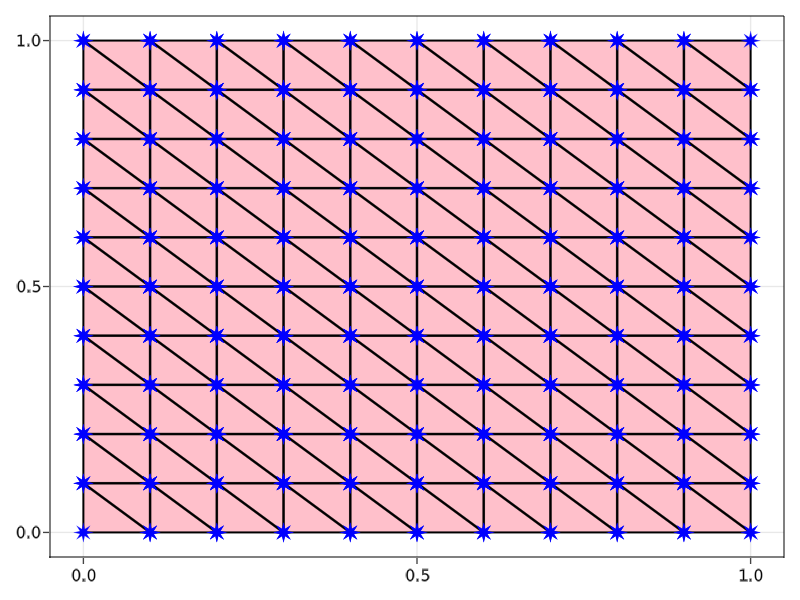

In [13]:
fig = plot(Ω)
wireframe!(Ω, color=:black, linewidth=2)
scatter!(Ω, marker=:star8, markersize=20, color=:blue)
save("images/2d_Fig1.png", fig)
fig

In [4]:
reffe = ReferenceFE(lagrangian, Float64, 1)
V = FESpace(model, reffe)
uh = interpolate(x->sin(π*(x[1]+x[2])), V)


SingleFieldFEFunction():
 num_cells: 200
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 12343356076049088128

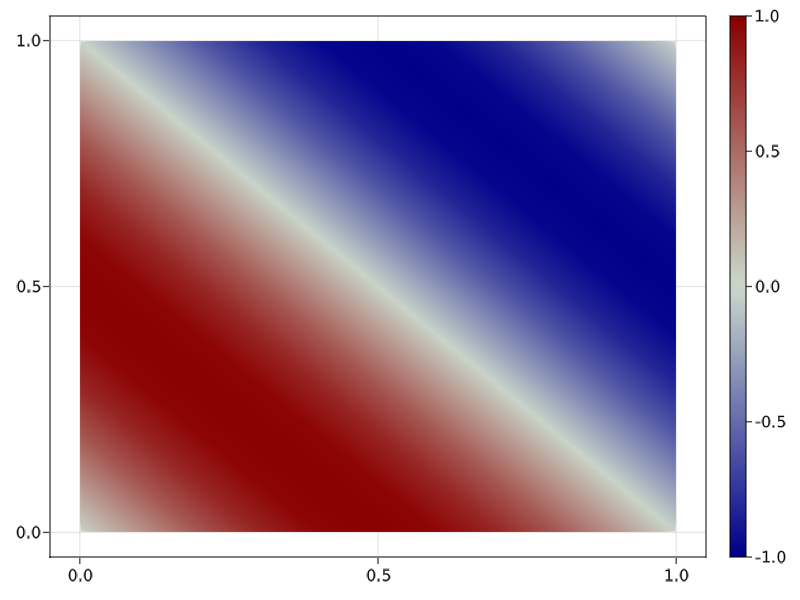

In [14]:
fig, _ , plt = plot(Ω, uh)
Colorbar(fig[1,2], plt)
save("images/2d_Fig11.png", fig)
fig

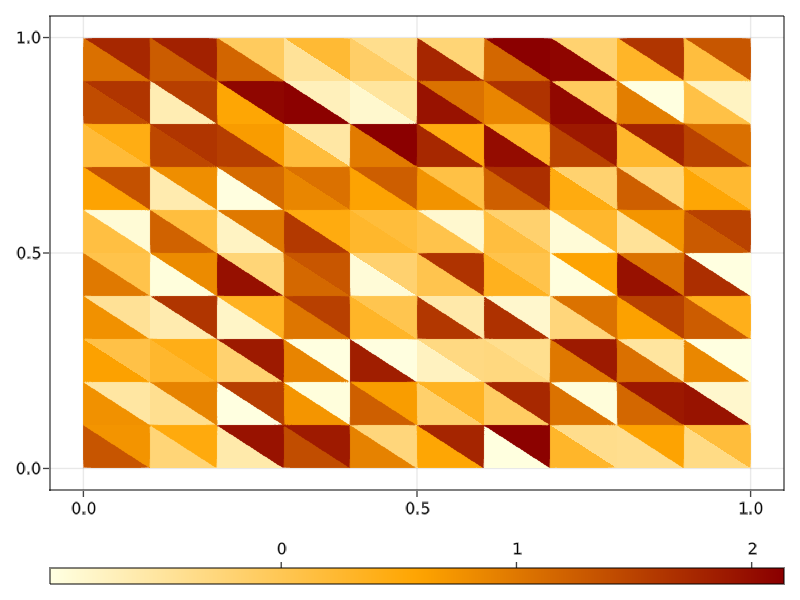

In [15]:
celldata = π*rand(num_cells(Ω)) .-1
fig, _ , plt = plot(Ω, color=celldata, colormap=:heat)
Colorbar(fig[2,1], plt, vertical=false)
save("images/2d_Fig13.png", fig)
fig

In [16]:
Γ = BoundaryTriangulation(model)
fig, _ , plt = plot(Γ, uh, colormap=:algae, linewidth=10)
Colorbar(fig[1,2], plt)
save("images/2d_Fig111.png", fig)
display(fig)

GLMakie.Screen(...)

In [17]:
url = "https://github.com/gridap/GridapMakie.jl/raw/d5d74190e68bd310483fead8a4154235a61815c5/_readme/model.json"
download(url,"models/model.json")

"models/model.json"

In [25]:
model = DiscreteModelFromFile("models/model.json")
Ω = Triangulation(model)
∂Ω = BoundaryTriangulation(model)
fig = plot(Ω, shading=true)
wireframe!(∂Ω, color=:black)
save("images/3d_Fig1.png", fig)
display(fig)

GLMakie.Screen(...)

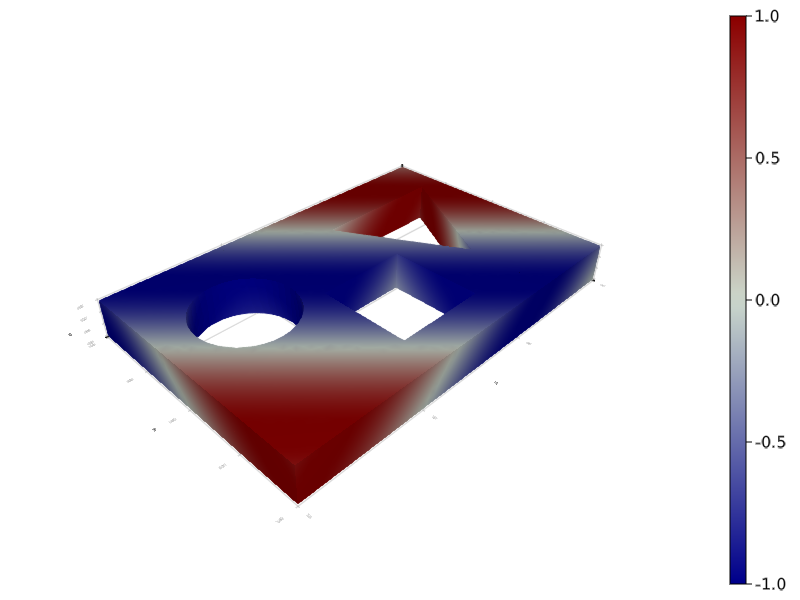

In [23]:
v(x) = sin(π*(x[1]+x[2]+x[3]))
fig, ax, plt = plot(Ω, v, shading=true)
Colorbar(fig[1,2], plt)
save("images/3d_Fig2.png", fig)
fig

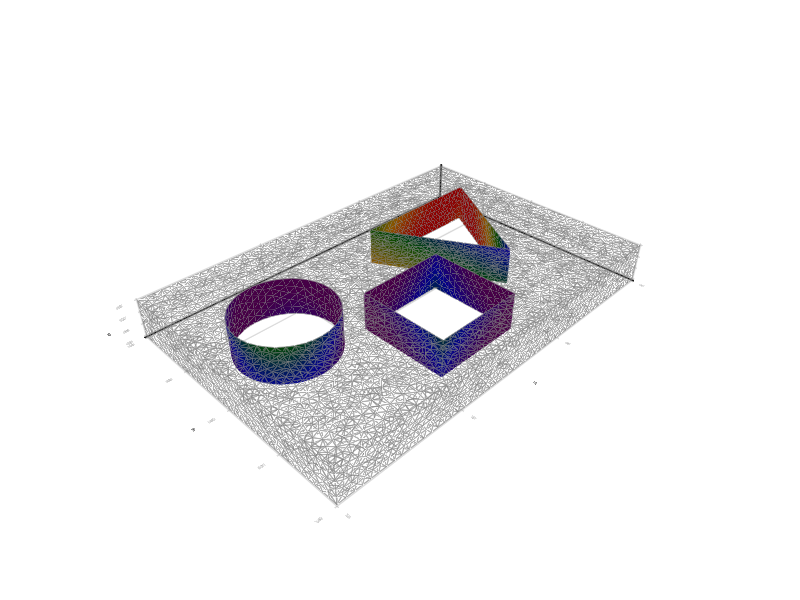

In [24]:
Γ = BoundaryTriangulation(model, tags=["square", "triangle", "circle"])
fig = plot(Γ, v, colormap=:rainbow, shading=true)
wireframe!(∂Ω, linewidth=0.5, color=:gray)
save("images/3d_Fig3.png", fig)
fig

In [21]:
t = Observable(0.0)
u = lift(t) do t
    x->sin(π*(x[1]+x[2]+x[3]))*cos(π*t)
end
fig = plot(Ω, u, colormap=:rainbow, shading=true, colorrange=(-1,1))
wireframe!(∂Ω, color=:black, linewidth=0.5)
framerate = 30
timestamps = range(0, 2, step=1/framerate)
record(fig, "images/animation.gif", timestamps; framerate=framerate) do this_t
    t[] = this_t
end
display(fig)

"images/animation.gif"